# NAME - SHIKHA ANAND
# CONTACT - 9742292633
# UNID - UMIP282191

This Dataset contains more than 300k employee records found in San Francisco from
2011 to 2018.
Complete and accurate information is necessary to increase public understanding of
government and help decision makers, including elected officials and voters, make
informed decisions.
This Dataset is provided by the Nevada Policy Research Institute as a public service
and is dedicated to providing accurate, comprehensive and easily searchable
information on the compensation of public employees in California.

# Objective

The project aims to analyze employee compensation data, including BasePay,
OvertimePay, OtherPay, Benefits, and their relation to TotalPay and TotalPayBenefits.
This is achieved through Exploratory Data Analysis (EDA) and Visualization using
Python.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#Read the Data and make a DataFrame
df = pd.read_csv("Total.csv")

C:\Users\shikh\AppData\Local\Temp\ipykernel_8972\1633301223.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Total.csv")


In [44]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [45]:
#Check the Shape of the DataFrame

print('This Dataset countains {} Rows and {} Columns'.format(df.shape[0], df.shape[1]))

This Dataset countains 312882 Rows and 9 Columns


In [46]:
#Check other information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


The above window shows that:

1- All columns have 312882 records (We don't have any missing data)

2- Columns (BasPay, OvertimePay, OtherPay and Benefits) are in object format. Therefore, for analyzing these columns, we must change their type to float64. So,..

In [52]:
series_list = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for series in series_list:
    df[series] = pd.to_numeric(df[series], errors='coerce')

In [53]:
#Check the dataset information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


#### Descriptive Statistical Analysis

In [57]:
df['BasePay'].mean()

69808.2574960612

In [59]:
df['BasePay'].max()

592394.34

In [61]:
df['BasePay'].describe()

count    312276.000000
mean      69808.257496
std       45376.929428
min        -474.400000
25%       35722.365000
50%       67710.450000
75%       99312.302500
max      592394.340000
Name: BasePay, dtype: float64

In [63]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312276.000000,312881.000000,312881.000000,276722.000000,312882.000000,312882.000000,312882.000000
mean,69808.257496,5668.929393,3460.694974,25016.917292,78802.645788,100928.339777,2014.625303
std,45376.929428,12745.655309,7387.263120,15089.077103,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35722.365000,0.000000,0.000000,12729.762500,38803.000000,48955.072500,2013.000000
50%,67710.450000,0.000000,728.000000,28327.330000,74908.790000,100011.290000,2015.000000
75%,99312.302500,5223.120000,3958.680000,35268.162500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


#### Like me, you may be curious about this negative BasePay

#### So, let me check who have negetaive BasePay?

In [66]:
df[df['BasePay']<0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
72832,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.00,6.56,83.01,89.57,2012
72865,Robert Scott,Junior Clerk,-121.63,182.70,0.00,5.44,61.07,66.51,2012
72872,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.00,4.32,54.61,58.93,2012
72874,Jordan Li,Junior Clerk,-106.60,159.90,0.00,4.66,53.30,57.96,2012
72878,Richard Jackson,Junior Clerk,-101.88,153.08,0.00,4.55,51.20,55.75,2012
72884,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.00,4.17,46.83,51.00,2012
72888,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.00,3.89,43.68,47.57,2012
72894,Douglas Avalos,Junior Clerk,-75.67,113.76,0.00,3.39,38.09,41.48,2012
72908,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.00,2.68,30.06,32.74,2012
72920,Charles Williams,Junior Clerk,-30.58,45.87,0.00,1.36,15.29,16.65,2012


The above table shows that 13 employee get negetavie BasePay. It needs to be check.

lets explore some insights about "Ricardo Jimenez"?

In [70]:
df[df['EmployeeName']=='Ricardo Jimenez']

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
50596,Ricardo Jimenez,Transit Supervisor,72936.93,8078.04,3701.18,31355.90,84716.15,116072.05,2012
120452,Ricardo Jimenez,Transit Supervisor,89128.98,14206.09,2677.35,33912.52,106012.42,139924.94,2014
160317,Ricardo Jimenez,Transit Supervisor,89623.29,8757.50,2556.00,32716.82,100936.79,133653.61,2015
198692,Ricardo Jimenez,Transit Supervisor,97131.01,10767.28,2572.50,33947.81,110470.79,144418.60,2016
240214,Ricardo Jimenez,Transit Supervisor,100900.50,8531.81,2838.00,35989.91,112270.31,148260.22,2017
299079,Ricardo Jimenez,Transit Supervisor,61286.00,2780.30,1417.50,22218.57,65483.80,87702.37,2018


In [72]:
df[df['EmployeeName']=='Ricardo Jimenez'][['BasePay', 'Year']]

,BasePay,Year
50596,72936.93,2012
120452,89128.98,2014
160317,89623.29,2015
198692,97131.01,2016
240214,100900.50,2017
299079,61286.00,2018


In [74]:
A=df['Year'].nunique()
B=df['Year'].unique()
print('The information of {} Years are available in this data set: {}'.format(A,B))

The information of 8 Years are available in this data set: [2011 2012 2013 2014 2015 2016 2017 2018]


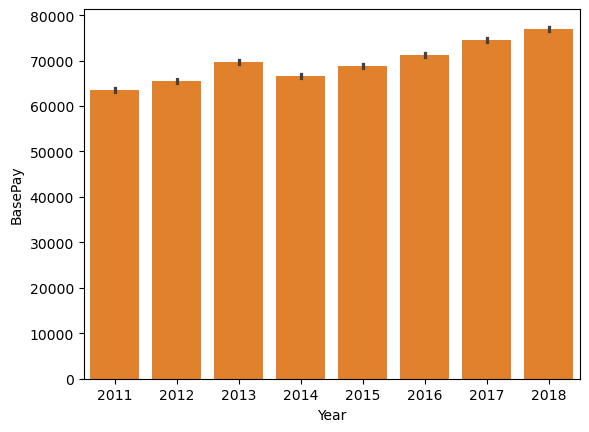

In [84]:
sns.barplot(data=df,x='Year', y='BasePay')
plt.show()

In [85]:
df['JobTitle'].value_counts().head(5)

JobTitle
Transit Operator    17995
Special Nurse       10857
Registered Nurse     9249
Firefighter          5891
Custodian            5759
Name: count, dtype: int64

In [88]:
df.groupby('Year').nunique()['JobTitle']

Year
2011    1045
2012    1044
2013    1051
2014     996
2015    1010
2016    1009
2017    1017
2018    1000
Name: JobTitle, dtype: int64

In [90]:
df[df['Year']==2013]['JobTitle'].nunique()

1051

In [92]:
sum(df[df['Year']==2013]['JobTitle'].value_counts()==1)

202

In [94]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

sum(df['JobTitle'].apply(lambda x: chief_string(x)))

1236